<a href="https://colab.research.google.com/github/DrMiracle/Colab-Projects/blob/main/Mini_project_(Computer_vision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project uses Stable Diffusion to generate images and then makes pseudo-thermal images from them using Dpt Large model for depth estimation.

In [ ]:
!pip uninstall torch -y
!pip install -q transformers torch Pillow matplotlib requests accelerate diffusers

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0


In [1]:
import io
import requests
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
from transformers import DPTImageProcessor, DPTForDepthEstimation
from diffusers import StableDiffusionPipeline

if torch.cuda.is_available():
    device = "cuda"
    torch_dtype = torch.float16
else:
    device = "cpu"
    torch_dtype = torch.float32

print(f"Using device: {device}")

Using device: cuda


In [ ]:
diffusion_model_id = "runwayml/stable-diffusion-v1-5"
diffusion_pipe = None
print(f"Loading Stable Diffusion model: {diffusion_model_id}...")

diffusion_pipe = StableDiffusionPipeline.from_pretrained(
    diffusion_model_id,
    torch_dtype=torch_dtype
).to(device)

print("Stable Diffusion pipeline loaded successfully.")

In [ ]:
depth_model_name = "Intel/dpt-large"
depth_processor = None
depth_model = None
print(f"Loading Depth Estimation model: {depth_model_name}...")

depth_processor = DPTImageProcessor.from_pretrained(depth_model_name)
depth_model = DPTForDepthEstimation.from_pretrained(
    depth_model_name,
    torch_dtype=torch_dtype if device == "cuda" else torch.float32
).to(device)

print("Depth estimation model loaded successfully.")

In [4]:
def display_image(image, title="Image", cmap=None):
    """Displays an image using matplotlib."""
    plt.figure(figsize=(9, 8))
    img_display = plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    if "thermal" in title.lower():
      plt.colorbar(img_display, fraction=0.046, pad=0.04)
    plt.show()

def generate_image_from_prompt(prompt, num_inference_steps=50, guidance_scale=7.5):
    """Generates an image using Stable Diffusion pipeline."""
    if diffusion_pipe is None:
        print("Stable Diffusion pipeline not loaded.")
        return None
    print(f"Generating image for prompt: '{prompt}'...")

    with torch.autocast(device):
          result = diffusion_pipe(
              prompt,
              num_inference_steps=num_inference_steps,
              guidance_scale=guidance_scale
          )

    generated_image = result.images[0]
    print("Image generated successfully.")
    return generated_image


def generate_pseudo_thermal(image, colormap='inferno'):
    """Generates a pseudo-thermal image using depth estimation and a colormap."""
    if depth_model is None or depth_processor is None:
        print("Depth estimation model not loaded.")
        return None
    if image is None:
        print("Input image for pseudo-thermal generation is None.")
        return None

    print("Estimating depth for pseudo-thermal visualization...")

    inputs = depth_processor(images=image, return_tensors="pt").to(device)

    if device == "cuda":
        inputs['pixel_values'] = inputs['pixel_values'].to(torch_dtype)

    with torch.no_grad():
        outputs = depth_model(**inputs)
        predicted_depth = outputs.predicted_depth

    # interpolate depth map
    prediction = torch.nn.functional.interpolate(
        predicted_depth.unsqueeze(1).float(),
        size=image.size[::-1], # PIL
        mode="bicubic",
        align_corners=False,
    ).squeeze()

    # normalize depth map
    output = prediction.cpu().numpy()
    min_val = np.min(output)
    max_val = np.max(output)
    if max_val > min_val:
        normalized_depth = (output - min_val) / (max_val - min_val)
    else:
        normalized_depth = np.zeros(output.shape, dtype=np.float32)

    cmap = cm.get_cmap(colormap)
    pseudo_thermal_image = cmap(normalized_depth)[:, :, :3]
    pseudo_thermal_image_pil = Image.fromarray((pseudo_thermal_image * 255).astype(np.uint8))

    print("Pseudo-thermal image generated.")
    return pseudo_thermal_image_pil

Starting Image Generation and Visualization
Generating image for prompt: 'Soldiers at an army base, cinematic lighting'...


  0%|          | 0/100 [00:00<?, ?it/s]

Image generated successfully.


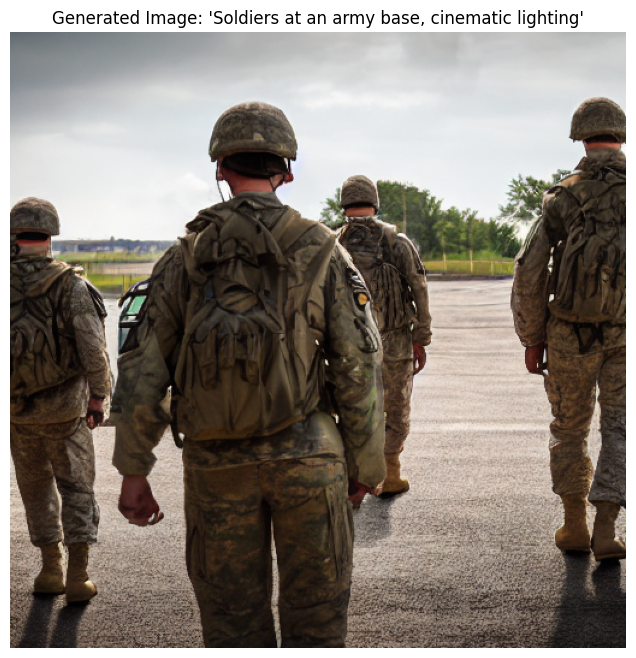


Generating pseudo-thermal view from the generated image...
Estimating depth for pseudo-thermal visualization...


<ipython-input-4-c173cec86dd3>:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


Pseudo-thermal image generated.


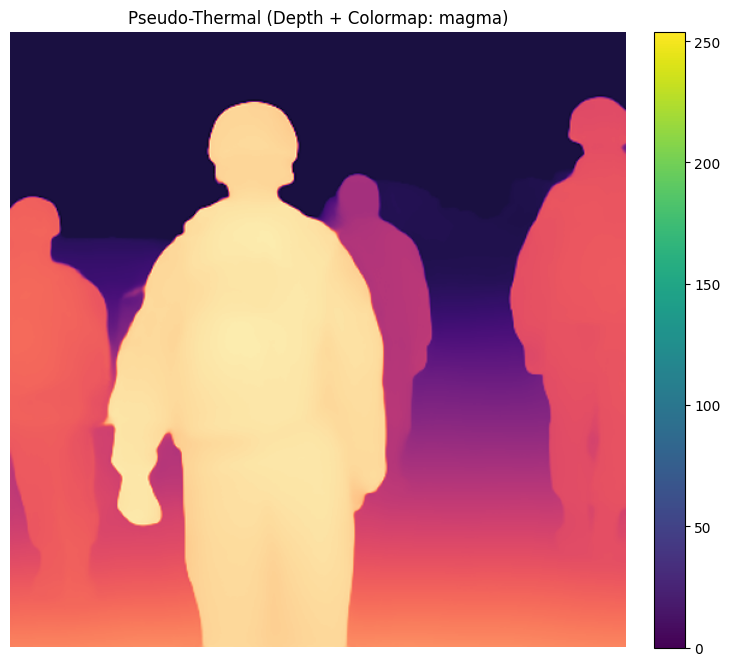

Starting Image Generation and Visualization
Generating image for prompt: 'Canyon landscape with deep valleys and rocky formations, serene, scenic view'...


  0%|          | 0/100 [00:00<?, ?it/s]

Image generated successfully.


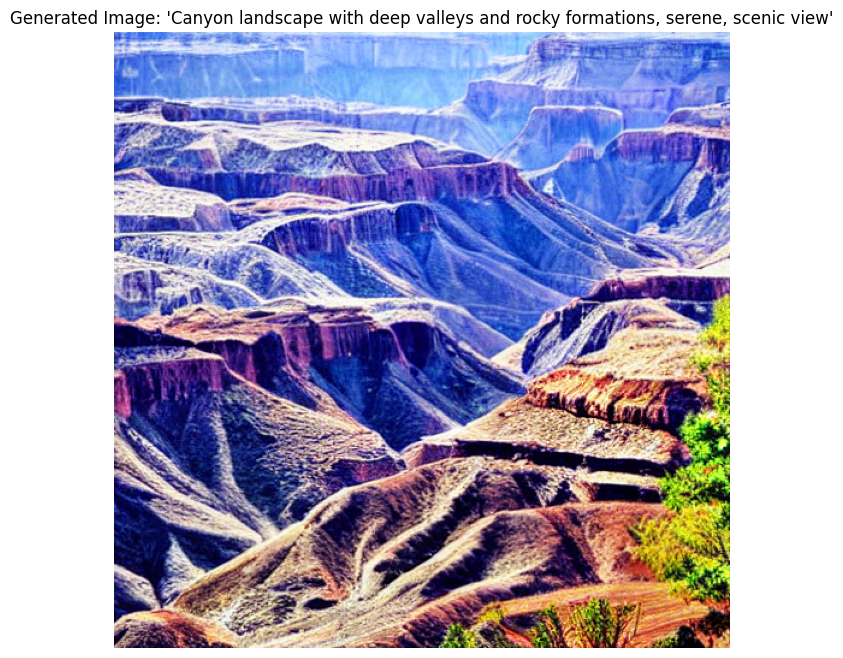


Generating pseudo-thermal view from the generated image...
Estimating depth for pseudo-thermal visualization...
Pseudo-thermal image generated.


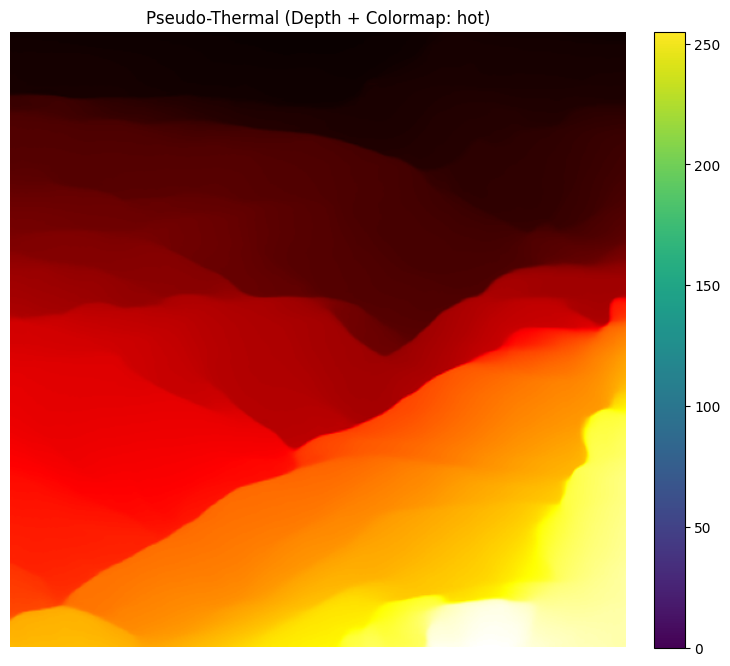

Starting Image Generation and Visualization
Generating image for prompt: 'Astronaut in deep space in face of eldritch horror'...


  0%|          | 0/100 [00:00<?, ?it/s]

Image generated successfully.


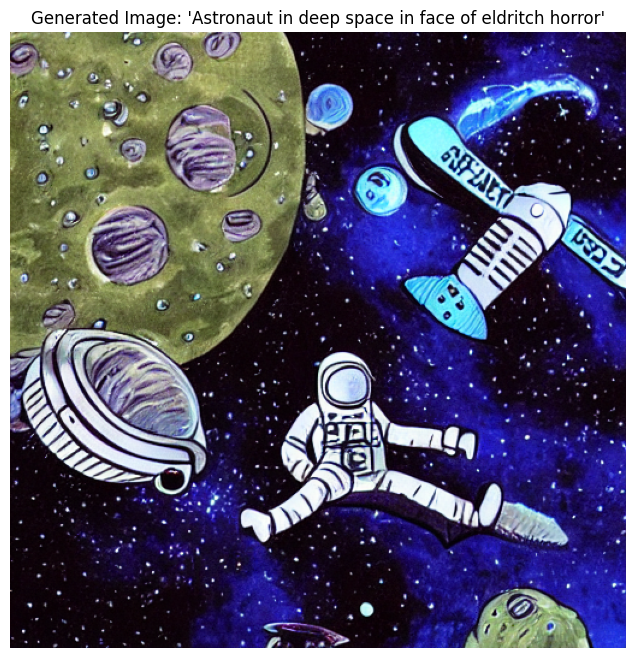


Generating pseudo-thermal view from the generated image...
Estimating depth for pseudo-thermal visualization...
Pseudo-thermal image generated.


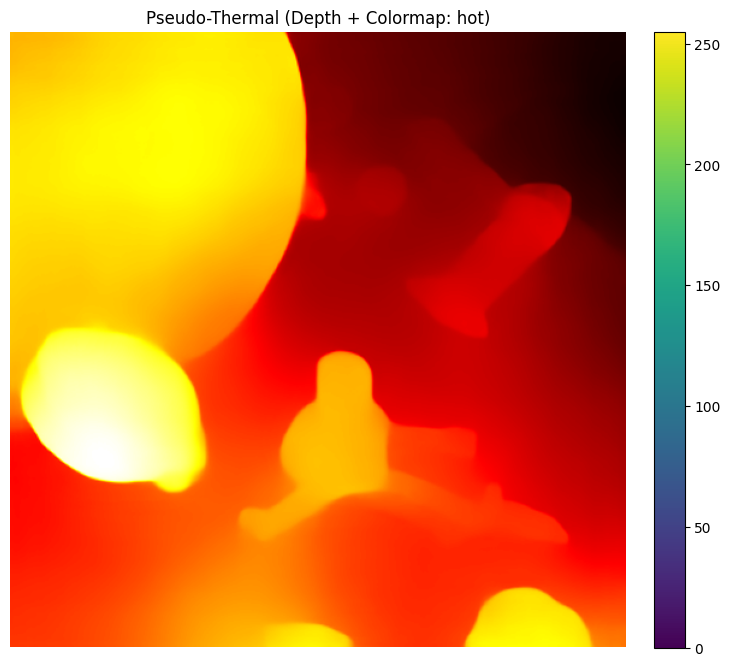

Starting Image Generation and Visualization
Generating image for prompt: 'Meme'...


  0%|          | 0/100 [00:00<?, ?it/s]

Image generated successfully.


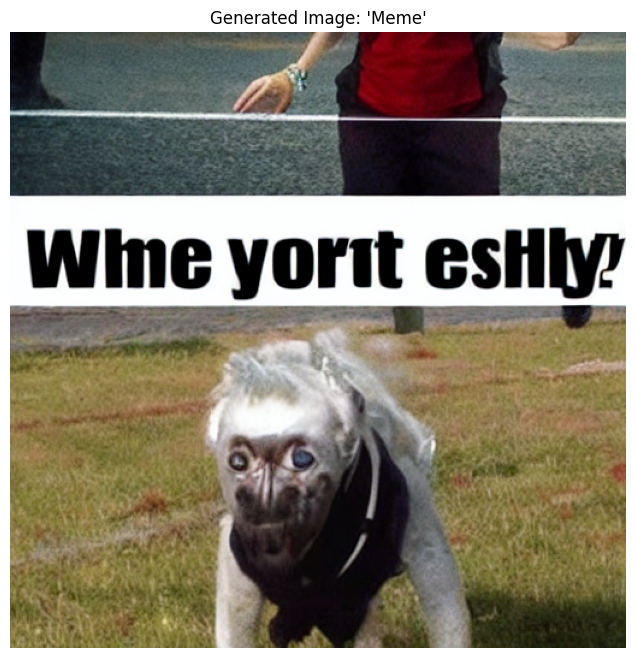


Generating pseudo-thermal view from the generated image...
Estimating depth for pseudo-thermal visualization...
Pseudo-thermal image generated.


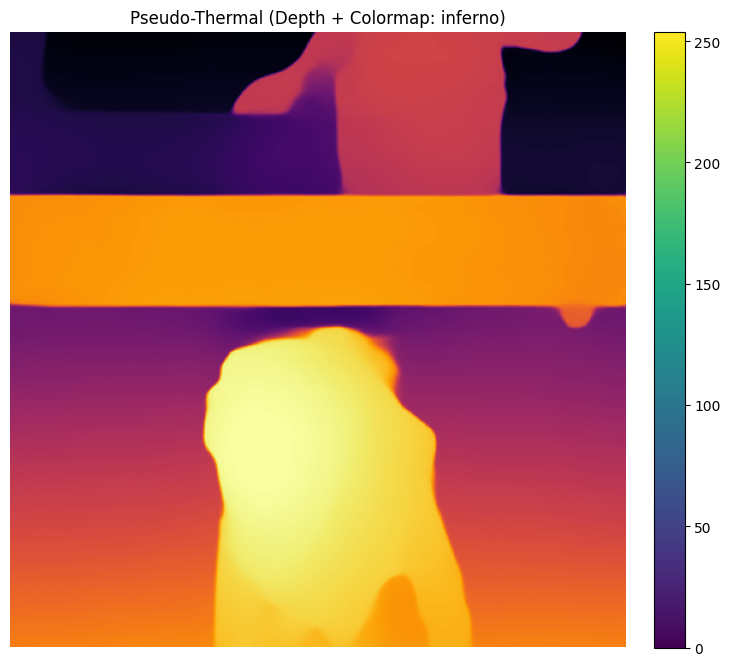

Starting Image Generation and Visualization
Generating image for prompt: 'a living room, bright modern Scandinavian style house, large windows, magazine photoshoot, 8k, studio lighting'...


  0%|          | 0/100 [00:00<?, ?it/s]

Image generated successfully.


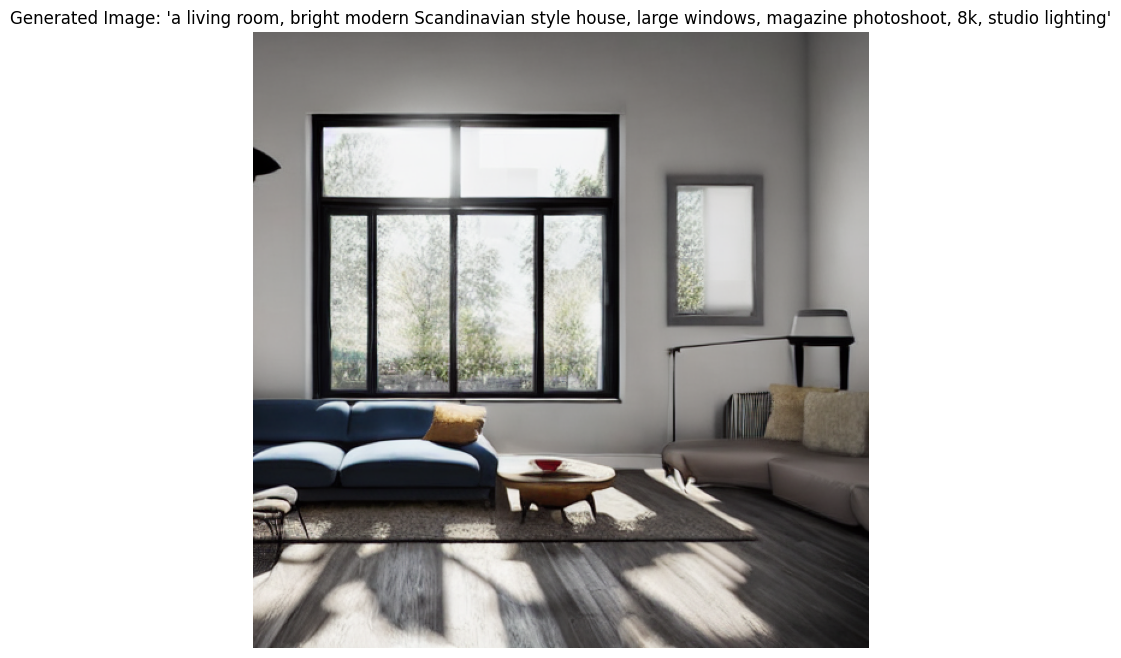


Generating pseudo-thermal view from the generated image...
Estimating depth for pseudo-thermal visualization...
Pseudo-thermal image generated.


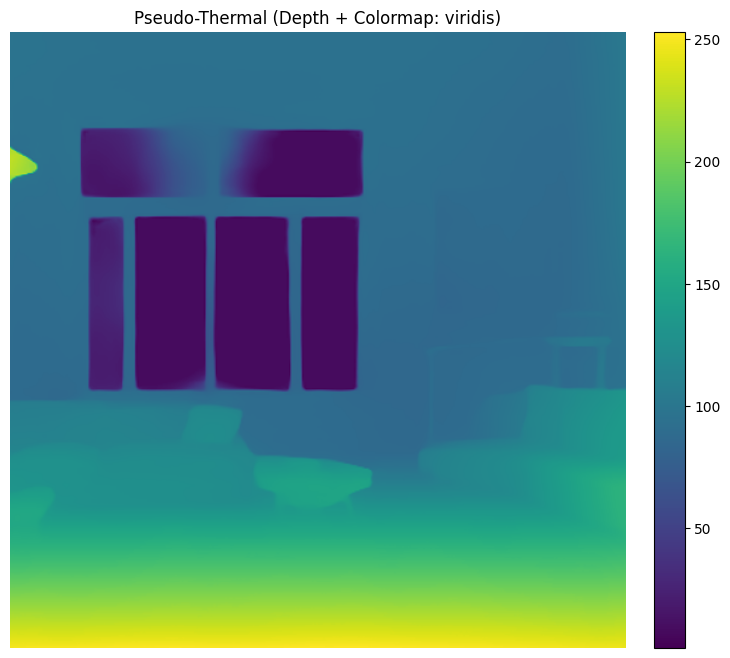

Starting Image Generation and Visualization
Generating image for prompt: 'double exposure portrait of a woman, splash art, gouache, triadic colours, thick opaque strokes, brocade, depth of field, hyperdetailed, whimsimcal, amazing depth, dynamic'...


  0%|          | 0/100 [00:00<?, ?it/s]

Image generated successfully.


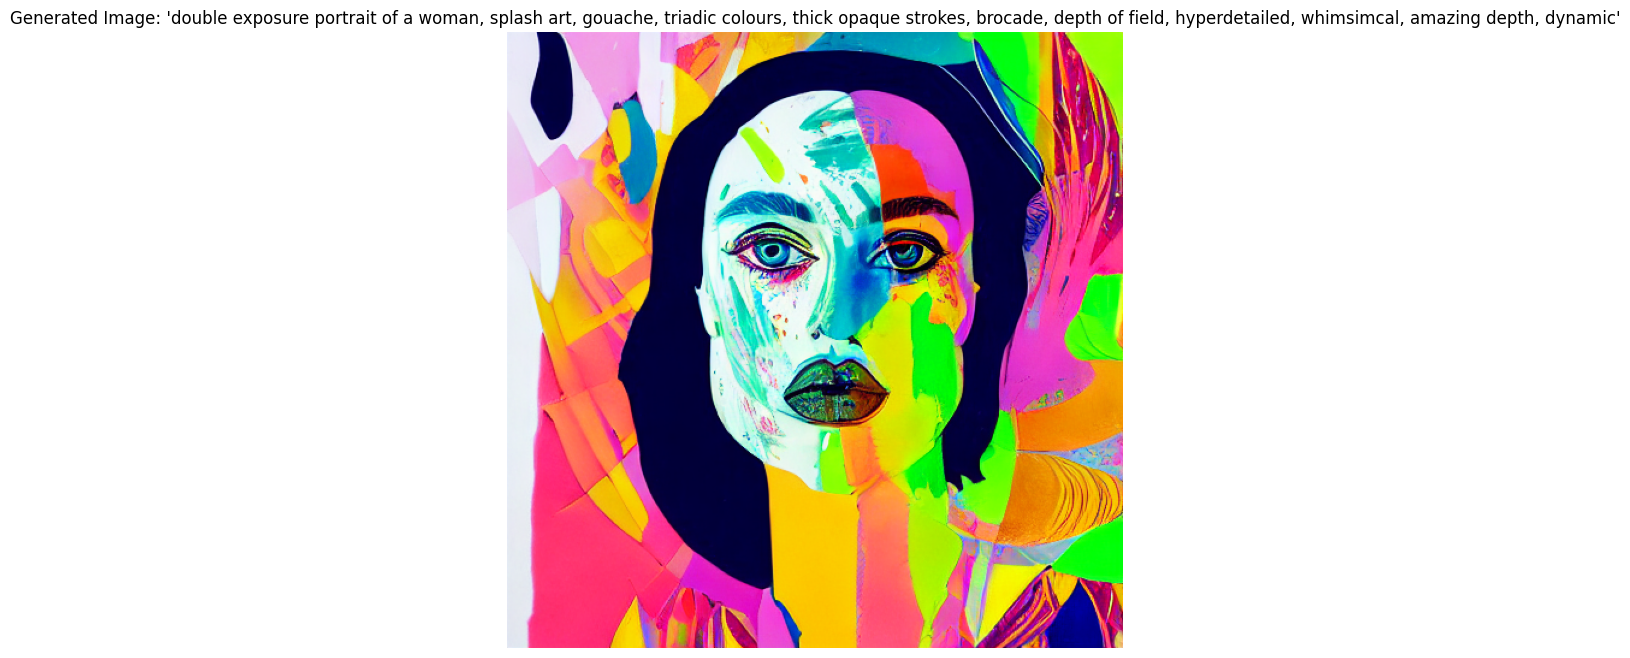


Generating pseudo-thermal view from the generated image...
Estimating depth for pseudo-thermal visualization...
Pseudo-thermal image generated.


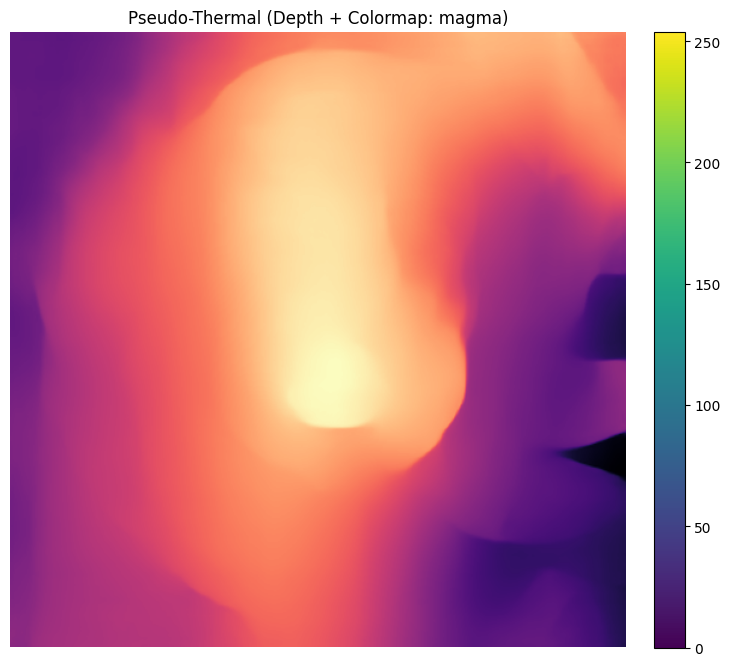

Starting Image Generation and Visualization
Generating image for prompt: 'abandoned city with ruined buildings, long deserted streets, cars aged by time, trees, flowers, scattered leaves, empty street, vibrant colors, lineart'...


  0%|          | 0/100 [00:00<?, ?it/s]

Image generated successfully.


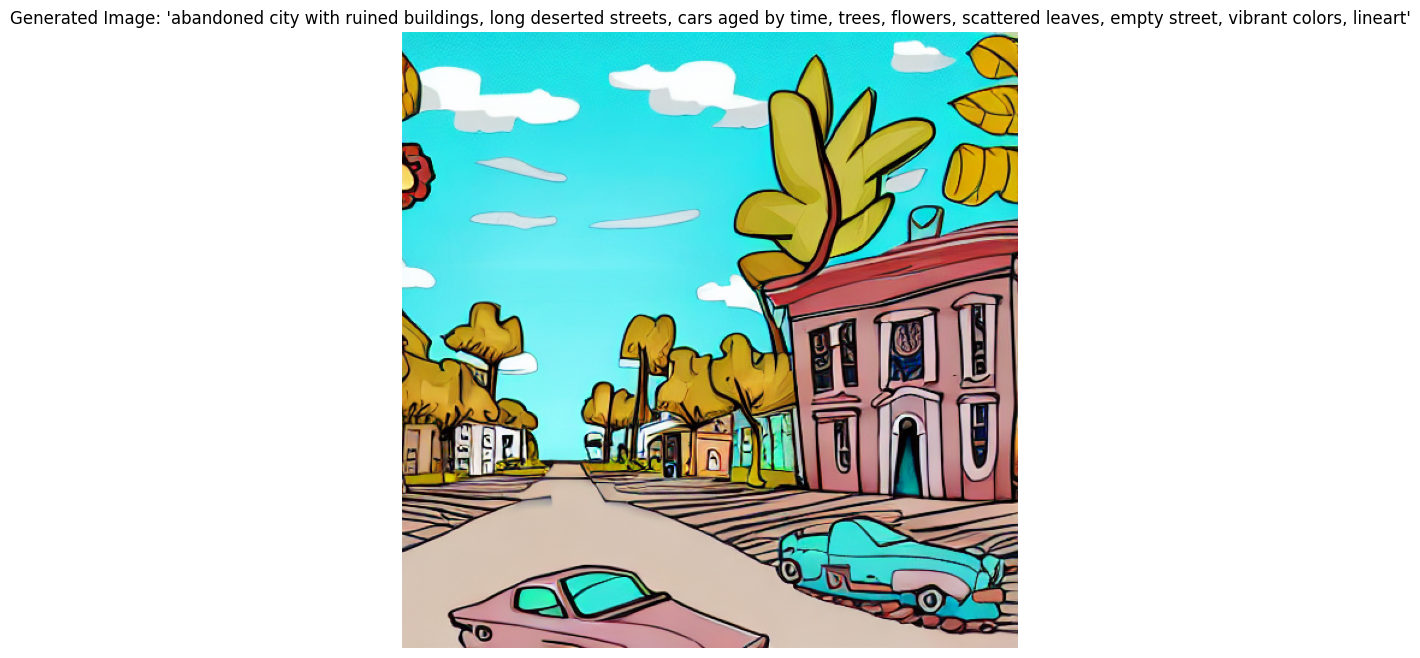


Generating pseudo-thermal view from the generated image...
Estimating depth for pseudo-thermal visualization...
Pseudo-thermal image generated.


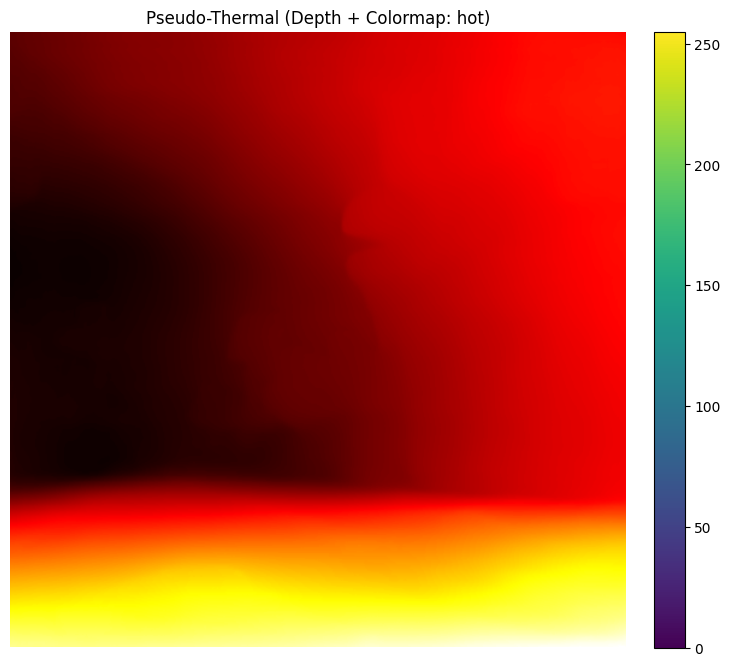


Processing finished.


In [6]:
prompts = ["Soldiers at an army base, cinematic lighting", "Canyon landscape with deep valleys and rocky formations, serene, scenic view", "Astronaut in deep space in face of eldritch horror", "Meme",
           "a living room, bright modern Scandinavian style house, large windows, magazine photoshoot, 8k, studio lighting",
           "double exposure portrait of a woman, splash art, gouache, triadic colours, thick opaque strokes, brocade, depth of field, hyperdetailed, whimsimcal, amazing depth, dynamic",
           "abandoned city with ruined buildings, long deserted streets, cars aged by time, trees, flowers, scattered leaves, empty street, vibrant colors, lineart"]

num_steps = 100      # Number of diffusion steps
guidance = 7.5       # Guidance scale

thermal_colormaps = ['inferno', 'hot', 'plasma', 'magma', 'viridis']

for prompt in prompts:
  print("Starting Image Generation and Visualization")

  generated_image_pil = generate_image_from_prompt(
      prompt,
      num_inference_steps=num_steps,
      guidance_scale=guidance
  )

  if generated_image_pil:
      display_image(generated_image_pil, title=f"Generated Image: '{prompt}'")

      print("\nGenerating pseudo-thermal view from the generated image...")
      colormap_choice = random.choice(thermal_colormaps)
      pseudo_thermal_img = generate_pseudo_thermal(
          generated_image_pil,
          colormap=colormap_choice
      )

      if pseudo_thermal_img:
          display_image(pseudo_thermal_img, title=f"Pseudo-Thermal (Depth + Colormap: {colormap_choice})")
      else:
          print("Failed to generate pseudo-thermal image.")

  else:
      print(f"Could not generate image for the prompt.")

print("\nProcessing finished.")